In [ ]:
# connect colab to google drive

from google.colab import drive
drive.mount('/content/drive')

#import docs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = "/content/drive/MyDrive/Colab Notebooks/data/HW4-data-fedPapers85.csv"

feddata = pd.read_csv(file)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 0, ' ')

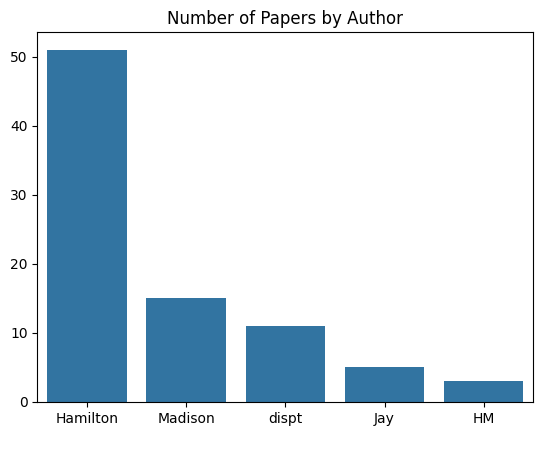

In [ ]:
#dropping filename
feddata = feddata.drop(feddata.columns[1], axis=1)
feddata.head()
#visualizing number of papers per author
counts = feddata['author'].value_counts()


sns.barplot(x=counts.index, y=counts.values)
plt.title('Number of Papers by Author')
plt.xlabel(' ')



<ipython-input-38-2576910ca54a>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  word_frequencies_dispt = feddata_dispt.mean().sort_values(ascending=False)


Text(0, 0.5, ' ')

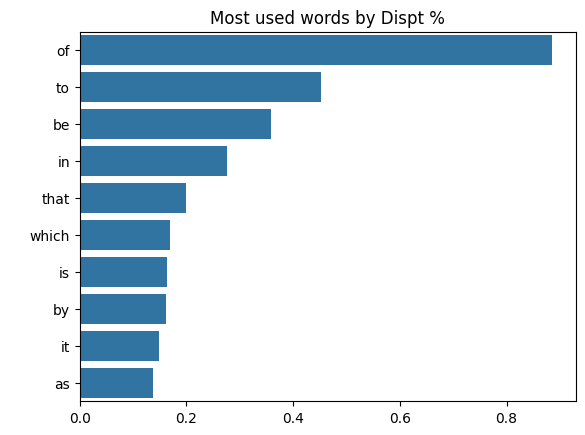

In [ ]:
#dispt most used
feddata_dispt = feddata[feddata['author'] == 'dispt']
word_frequencies_dispt = feddata_dispt.mean().sort_values(ascending=False)
word_frequencies_dispt = word_frequencies_dispt.iloc[1:11]
sns.barplot(x=word_frequencies_dispt.values, y=word_frequencies_dispt.index)
plt.title('Most used words by Dispt %')
plt.ylabel(' ')


<ipython-input-36-cbe72a9b1c7a>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  word_frequencies_H = feddata_H.mean().sort_values(ascending=False)


Text(0, 0.5, ' ')

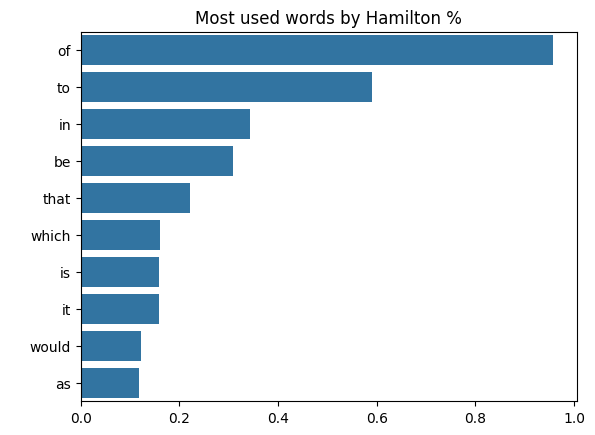

In [ ]:
#hamilton most used
feddata_H = feddata[feddata['author'] == 'Hamilton']
word_frequencies_H = feddata_H.mean().sort_values(ascending=False)
word_frequencies_H = word_frequencies_H.iloc[1:11]
sns.barplot(x=word_frequencies_H.values, y=word_frequencies_H.index)
plt.title('Most used words by Hamilton %')
plt.ylabel(' ')

<ipython-input-37-dbb06502ebd4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  word_frequencies_M = feddata_M.mean().sort_values(ascending=False)


Text(0, 0.5, ' ')

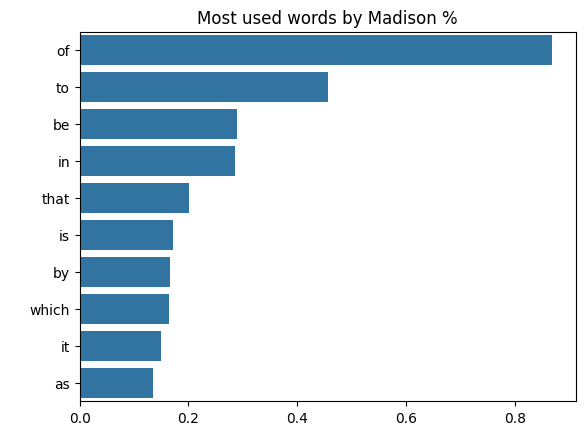

In [ ]:
#madison most used
feddata_M = feddata[feddata['author'] == 'Madison']
word_frequencies_M = feddata_M.mean().sort_values(ascending=False)
word_frequencies_M = word_frequencies_M.iloc[1:11]
sns.barplot(x=word_frequencies_M.values, y=word_frequencies_M.index)
plt.title('Most used words by Madison %')
plt.ylabel(' ')

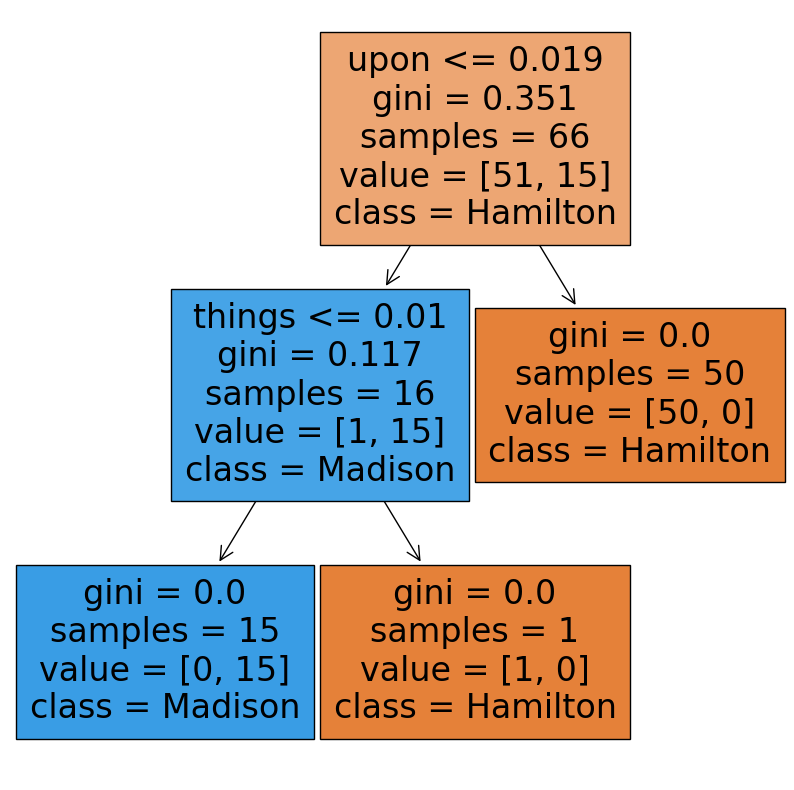

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

test_fed = feddata_dispt

train_fed = pd.concat([feddata_H, feddata_M], ignore_index=True)
#sourced from ChatGPT, this code creates the X axis by creating a dataframe with only the words and their prevelence and creates the Y axis as just the authors.
X_test = test_fed.drop(['author'],axis=1)
X_train = train_fed.drop(['author'],axis=1)

Y_test = test_fed.author
Y_train = train_fed.author

#Training the model
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

fig = plt.figure(figsize=(10,10))
_ = plot_tree(clf,
                   feature_names=X_train.columns,
                   class_names=Y_train.unique(),
                   filled=True)
#Testing Model
author_prediction = clf.predict(X_test)

In [ ]:
#displaying results of prediction
author_prediction




array(['Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Hamilton', 'Madison'],
      dtype=object)